In [27]:
import sys
sys.path.append('../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_runs = 3 # number of runs that the simulation was repeated

In [4]:
my_start = 400.0
my_stop = 1e4
my_step = 800

my_variables = list(np.arange(my_start, my_stop, my_step))
my_variables.insert(0, 0.0)
print(my_variables)

[0.0, 400.0, 1200.0, 2000.0, 2800.0, 3600.0, 4400.0, 5200.0, 6000.0, 6800.0, 7600.0, 8400.0, 9200.0]


### Load data

In [51]:
path_to_data = './'
study_name = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsONvsOFF_ayyScan' # title for save figures
study_name_1 = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_Nowakefields_ayyScan'
study_name_2 = 'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayyScan'
noise_type = 'PN'

my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
my_df_2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [6]:
my_df_1

,ayy_0.0,ayy_400.0,ayy_1200.0,ayy_2000.0,ayy_2800.0,ayy_3600.0,ayy_4400.0,ayy_5200.0,ayy_6000.0,ayy_6800.0,ayy_7600.0,ayy_8400.0,ayy_9200.0
m,"[7.767426660683154e-09, 1.4662318120752969e-08...","[1.4738524792537523e-08, 1.0155802182991532e-0...","[1.7943043063060912e-08, 2.137334405297463e-08...","[3.071948168764591e-08, 3.097217413246597e-08,...","[2.3568909307074906e-08, 2.956232668279994e-08...","[2.0059745249609936e-08, 2.4696882089553463e-0...","[2.2261993659942698e-08, 2.8402389764283837e-0...","[2.398808479496928e-08, 2.528093562139603e-08,...","[2.7245029033921125e-08, 1.622782380381154e-08...","[2.6209382067933643e-08, 2.0556638395660757e-0...","[2.3358567951987488e-08, 1.9430858373792852e-0...","[2.342203458663375e-08, 2.5160806043115456e-08...","[2.4509727033048256e-08, 2.4219875804966073e-0..."
b,"[2.0007193877852994e-06, 1.9975776622576943e-0...","[1.9996311404478142e-06, 2.0014730068835997e-0...","[2.006349034319196e-06, 1.9904638413755755e-06...","[1.995424639114703e-06, 1.9944819168577443e-06...","[2.0090368911931725e-06, 2.0035262783822962e-0...","[1.9994293683479494e-06, 1.9921567944777396e-0...","[2.0002643468516588e-06, 1.9975242980405527e-0...","[2.0037420509051596e-06, 1.9969378550117103e-0...","[2.0012422803632035e-06, 1.997554184365189e-06...","[2.0031381862686964e-06, 2.0007677126363595e-0...","[2.0057283944359043e-06, 2.001087576271033e-06...","[1.998898606009143e-06, 2.0005192843490985e-06...","[1.99660648574822e-06, 1.9963313667230493e-06,..."
err,"[1.4670654546078713e-10, 2.192126217162706e-10...","[1.0790547008484355e-10, 1.2328536871901518e-1...","[1.8120619931395314e-10, 1.3012728312832555e-1...","[1.3104515095576587e-10, 2.643016844390052e-10...","[1.1669682851401962e-10, 1.359385853041966e-10...","[5.853692156492791e-11, 9.300461324313984e-11,...","[4.148087673338987e-11, 7.627353378931952e-11,...","[5.878423286785988e-11, 1.0466384907248745e-10...","[1.1951949998512444e-10, 6.586596789638229e-11...","[1.3159393884865615e-10, 3.353766234640363e-11...","[4.7063078512866194e-11, 6.493207619967476e-11...","[9.746556048024452e-11, 6.974701788453585e-11,...","[1.0454048107328784e-10, 6.133428723421882e-11..."


In [7]:
my_df_keys = list(my_df_1.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_0.0', 'ayy_400.0', 'ayy_1200.0', 'ayy_2000.0', 'ayy_2800.0', 'ayy_3600.0', 'ayy_4400.0', 'ayy_5200.0', 'ayy_6000.0', 'ayy_6800.0', 'ayy_7600.0', 'ayy_8400.0', 'ayy_9200.0']


### Compute errors

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

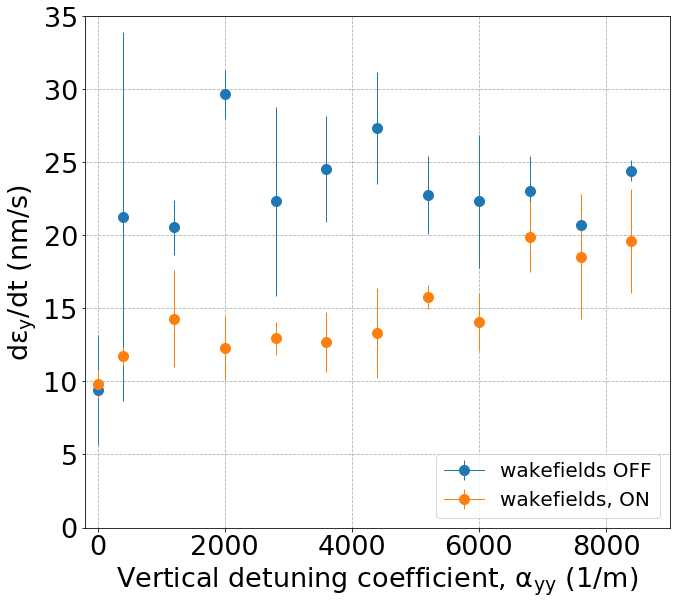

In [8]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    
plt.legend(loc=4)

plt.xlim(-200, 9000)
plt.ylim(0, 35)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}.png', bbox_inches='tight')

### Compute the theoretically expected rate

In [9]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [10]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 23.813362141833874 nm/s


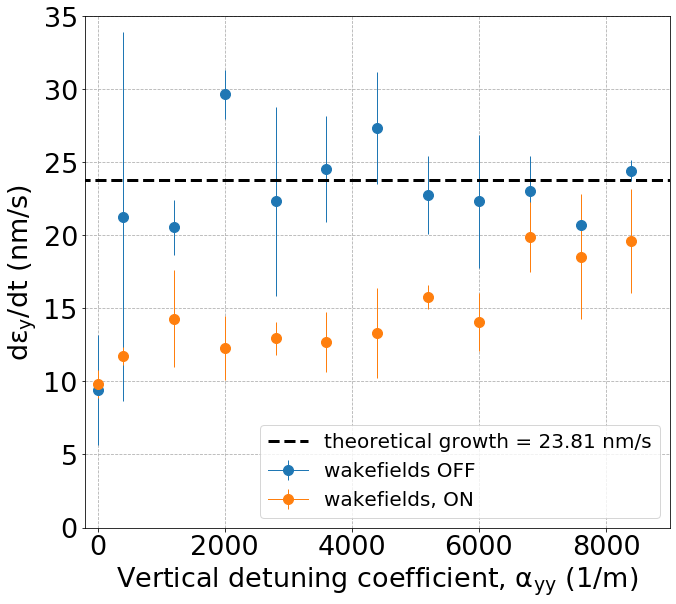

In [12]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

plt.hlines(expected_growth*1e9, -300, 10000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

plt.legend(loc=4)

plt.xlim(-200, 9000)
plt.ylim(0, 35)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}_vs_Theory.png', bbox_inches='tight')

### Compute rms detuning with amplitude

In [13]:
# Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name ='sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayy400.0_run0/'
bunch = pickle.load(open(path_to_data+study_name+'bunch', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5


PyHEADTAIL v1.13.5




In [21]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=6.9244903760955545e-09 m
rms(Jy)=6.942239455998446e-09 m


In [28]:
Dqy_rms = []
axy = 0
for ayy in my_variables:
    Dqy_rms.append(amplitude_detuning_y(rms_Jx_init, rms_Jy_init, ayy, axy))

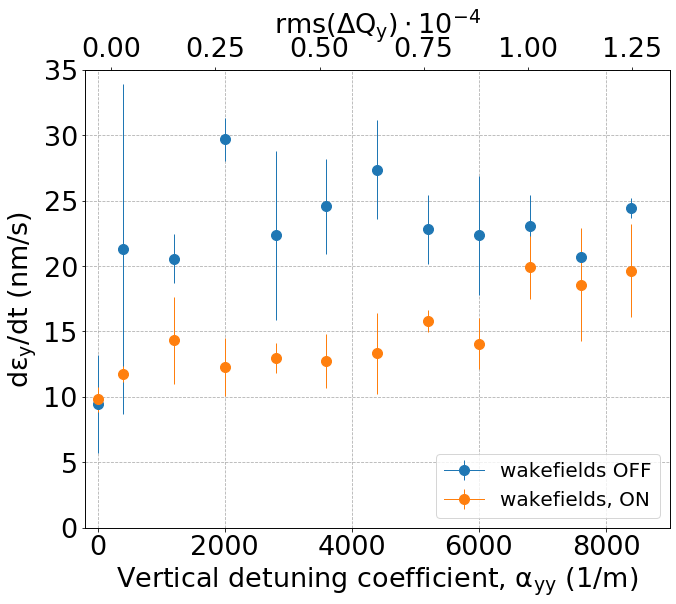

In [52]:
fig, ax = plt.subplots(1,1)

for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

ax2 = ax.twiny()
ax2.plot(np.array(Dqy_rms)*1e4, np.arange(0,13), linestyle='')

#plt.hlines(expected_growth*1e9, -300, 10000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=4)

ax.set_xlim(-200, 9000)
ax.set_ylim(0, 35)
ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
ax.set_xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$')


plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/{study_name}_vs_TuneSpread.png', bbox_inches='tight')